# Natural Language Processing (NLP) with TextaCy

In part 1, we focused on the preprocessing side of NLP. However, there are much more tasks with NLP. In this tutorial, we are going to cover some of these tasks, including:

### Table of Contents
- [Getting Started](#Getting-Started)
- [Loading Data](#Loading-Data)
- [More on Named Entities](#More-on-Named-Entities)
- [Part-of-Speech (POS) Tagging](#Part-of-Speech-Tagging)
- [NP & VP Chunking](#NP-&-VP-Chunking)
- [Term Extraction](#Term-Extraction)
- [Topic Modeling](#Topic-Modeling)
- [Conclusion](#Conclusion)

## Getting Started

We start with loading the `textacy` package again.

In [ ]:
!pip install textacy

In [ ]:
import textacy

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Loading Data

In this part, we will use the `CapitolWords()` dataset, which comes with TextaCy. We use the first 600 speeches.

In [ ]:
import textacy.datasets  # note the import
cw = textacy.datasets.CapitolWords()
cw.download()
records = cw.records(limit=600)
spacy_lang = textacy.load_spacy_lang("en_core_web_sm", disable=("parser",))
corpus = textacy.Corpus(spacy_lang, data=records)
print(corpus)

100%|██████████| 11.9M/11.9M [00:00<00:00, 43.3MB/s]


Corpus(600 docs, 351729 tokens)


We can look at the basic statistics of the `corpus`.

In [ ]:
corpus.n_docs, corpus.n_sents, corpus.n_tokens

(600, 0, 351729)

[Back to Top](#Table-of-Contents)

## More on Named Entities

In part 1, we touched upon named entities, however, we did not dig deep into them. Here are more on them ...

Named entities are about different objects in the real world, which include: time/date (`TIME/DATE`), location (`GPE`), organization (`ORG`), people/person (`NORP/PERSON`), number (`CARDINAL`), money (`MONEY`), ...

let's use the following example to show aforementioned types.

__NOTE__: do you know how TextaCy knows about these entities? Answer is TextaCy relies on a pre-trained __classification__ model to "guess"! Since it is classification, sometimes the named entities will be mis-classified.

In [ ]:
doc = corpus[1]
for ent in textacy.extract.entities(doc, drop_determiners=True):
    print(ent.text, ent.label_)

Speaker PERSON
40 days ago DATE


In NLP practices, named entities can be very important (for instance, to determine the context of a document, in [information retrieval](https://en.wikipedia.org/wiki/Information_retrieval)) to not important at all (for instance, in [topic modeling](https://en.wikipedia.org/wiki/Topic_model)). So based on different tasks, we may use different strategies:
- If they are important, extract them in a list;
- If they are not important, replace them with their respective labels (e.g. `PERSON` for 'Clinton').

### YOUR TURN HERE
Extract all `PERSON` entities from `doc`, and store them in a list namely `person_lst`.

In [ ]:
#### Complete your code here


[Back to Top](#Table-of-Contents)

# Part-of-Speech Tagging

After tokenization, spaCy/textaCy can parse and tag a given `Doc`. This is where the statistical model comes in, which enables spaCy/textaCy to make a prediction of which tag or label most likely applies in this context. A model consists of binary data and is produced by showing a system enough examples for it to make predictions that generalize across the language – for example, a word following “the” in English is most likely a __noun__.

This is done using the `pos_` attribute provided with `token` objects.

In [ ]:
for t in doc:
    print(t, t.pos_)

Mr. PROPN
Speaker PROPN
, PUNCT
a DET
relationship NOUN
, PUNCT
to PART
work VERB
and CCONJ
survive VERB
, PUNCT
has AUX
got VERB
to PART
be AUX
honest ADJ
and CCONJ
we PRON
have AUX
got VERB
to PART
deal VERB
with ADP
each DET
other ADJ
in ADP
good ADJ
faith NOUN
. PUNCT
For ADP
a DET
government NOUN
to PART
govern VERB
well ADV
, PUNCT
we PRON
have AUX
to PART
be AUX
honest ADJ
and CCONJ
we PRON
have AUX
to PART
deal VERB
with ADP
each DET
other ADJ
in ADP
good ADJ
faith NOUN
. PUNCT

 SPACE
The DET
President PROPN
has AUX
vetoed VERB
every DET
measure NOUN
we PRON
have AUX
sent VERB
to ADP
him PRON
that PRON
would AUX
balance VERB
the DET
budget NOUN
. PUNCT
He PRON
has AUX
a DET
constitutional ADJ
right NOUN
to PART
do AUX
that DET
. PUNCT
If SCONJ
he PRON
believes VERB
that SCONJ
our PRON
budget NOUN
devastates VERB
the DET
elderly ADJ
, PUNCT
he PRON
has AUX
a DET
moral ADJ
obligation NOUN
to PART
fight VERB
us PRON
. PUNCT
I PRON
will AUX
never ADV
, PUNCT
never ADV
say VERB
bad

### YOUR TURN HERE
Extract all non-stop verbs (`.pos_ == 'VERB'`) in its lemma form (`.lemma_`) from `doc`.

__HINT__: non-stop words can be filtered using the `is_stop` attribute of any token `t`.

In [ ]:
#### Complete your code here


### Additional Task

From above results, you can observe that many verbs are duplicated in the list. How can you remove the duplicates from the list? Can you return the number of unique (non-duplicate) verbs in `doc`?

__HINT__: Which of Python's data types forbids duplicates?

In [ ]:
#### Complete your code here


[Back to Top](#Table-of-Contents)

## NP & VP Chunking

From common sense, we know that words (tokens) may not be the most useful linguistic unit in text. Sometimes, phrases formed by words contain inseparable senses in text. Identifying phrases in text is called phrase chunking. Phrase chunking is a natural language process that separates and segments a sentence into its subconstituents, such as noun, verb, and prepositional phrases. [Source: Wikipedia](https://en.wikipedia.org/wiki/Phrase_chunking).

In practices, we focus mainly on Noun Phrases (NP) and Verb Phrases (VP).

For NP Chunking, textaCy provides a built-in method (`textacy.extract.noun_chunks()`):

In [ ]:
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
doc = nlp(doc.text)
for np in doc.noun_chunks:
    # this is to guarantee we are getting multi-word phrases not individual words
    if len(np.text.split()) > 1:
        print(np.text.lower())

mr. speaker
a relationship
good faith
a government
good faith
the president
every measure
the budget
a constitutional right
our budget
a moral obligation
bad things
their beliefs
an obligation
no.
mr. president
our view
a balanced budget
your view
a moral obligation
a legal and moral obligation
your commitment
a budget
the table
your obligation


Combining phrase (NP & VP) chunking with named entity extraction, you can extract more complicated linguistic patterns from text data.

Below code can extract multi-word named entities from `doc`:

In [ ]:
for ent in textacy.extract.entities(doc, drop_determiners=True):
    # this is to guarantee we are getting multi-word phrases not individual words
    if len(ent.text.split()) > 1:
        print(ent.text, ent.label_)

40 days ago DATE


Looks like with the help of machine learning, machines can understand a _little bit_ of text data, right?

[Back to Top](#Table-of-Contents)

Next, we are going to demonstrate advanced text analytics techniques.

## Term Extraction

We already learned how to extract words, named entities, or phrases from text. However, in text analytics, we do not treat every word/phrases equally - some of them are more important than others. We name these 'important' words/phrases as __terms__ (short for _terminologies_). Extracting terms from texts is an important NLP task.

TextaCy provides several term extraction methods.

In [ ]:
# Load Keyterms for TextRank & Srank
# make sure you import the sub-package
from textacy.extract.keyterms import sgrank, textrank
# SGRank
sgrank(doc, ngrams=(1, 2, 3, 4, 5, 6),
                        normalize='lemma', window_size=5, topn=10, idf=None)


[('moral obligation', 0.12131134503660299),
 ('day', 0.08563881199743276),
 ('Mr. Speaker', 0.08483781171213839),
 ('balanced budget', 0.08364142686774778),
 ('elderly', 0.07926833805659778),
 ('measure', 0.06861594833317336),
 ('Mr. President', 0.06208019550980229),
 ('table', 0.047400354161288696),
 ('commitment', 0.04680068732871002),
 ('view', 0.045858332130837245)]

In [ ]:
# Text rank
textrank(doc, normalize='lemma', topn=10)

[('balanced budget', 0.02452474186505362),
 ('moral obligation', 0.020061857095982145),
 ('Mr. President', 0.018238829856377058),
 ('bad thing', 0.015935365228319082),
 ('good faith', 0.015226173548070786),
 ('Mr. Speaker', 0.014177969796231593),
 ('constitutional right', 0.01234375107065918),
 ('view', 0.010340185533491218),
 ('belief', 0.007631827373029533),
 ('day', 0.007625216562535486)]

From these terms, can you get an understanding regarding the `doc`?

[Back to Top](#Table-of-Contents)

## Topic Modeling

The most advanced technique for document understanding is named __Topic Modeling__, which relies on the (co-)occurrences of words/tokens/terms.

TextaCy provides a method (`textacy.tm.topic_model.TopicModel`) for topic modeling purposes. To creating topic modeling, we need to generate word vectors, in which each word in represented using a vector. This functionality is built on scikit-learn.

<img src='https://cdn-images-1.medium.com/max/1080/1*2r1yj0zPAuaSGZeQfG6Wtw.png' />

In [ ]:
doc = corpus[0]
for t in textacy.extract.terms(nlp(doc.text), ngs=2, ents=True, ncs=True):
  print(t)

Mr. Speaker
480,000 Federal
Federal employees
involuntary servitude
280,000 Federal
Federal employees
financial obligations
Mr. Speaker
rectified immediately
Newt Gingrich
Republican leadership
American people
people hostage
disastrous 7
year balanced
balanced budget
budget plan
Mr. Gingrich
Republican leadership
join Senator
Senator Dole
entire Senate
continuing resolution
reopen Government
Mr. Speaker
American people
people want
Speaker
480,000
280,000
Speaker
Republican
House
American
7-year
Georgia
Gingrich
Republican
Dole
Senate
Speaker
American
480,000 Federal employees
pay
280,000 Federal employees
they
Virtually all
workers
mortgages

Mr. Speaker
what
workers
they
their disastrous 7-year balanced budget plan
gentleman
Government

Mr. Speaker
that
what
that
what
they
that
what
body


In [ ]:
from textacy.representations.vectorizers import Vectorizer

# tokenized_docs = [t for t in textacy.extract.terms(nlp(doc.text), ngs=2, ents=True, ncs=True)
#                   for doc in corpus[:1000]]
tokenized_docs = []
for doc in corpus[:10000]:

  term_lst = [t.text for t in doc if t.is_stop == False]
  # print(term_lst)
  # break
  tokenized_docs.append(term_lst)

# tokenized_docs

In [ ]:
vectorizer = Vectorizer(
     tf_type="linear", idf_type="smooth", norm="l2", min_df = 1, max_df = 0.95,
    max_n_terms=100000)

In [ ]:
doc_term_matrix = vectorizer.fit_transform(tokenized_docs)

In [ ]:
vectorizer.terms_list[:5]

['\n', '\n ', '\n \n', '\n \n ', '!']

With a vectorized corpus (i.e. document-term matrix) and corresponding vocabulary (i.e. mapping of term strings to column indices in the matrix), we can then initialize and train a topic model:

In [ ]:
from textacy.tm import TopicModel
model = TopicModel('nmf', n_topics=20)
model.fit(doc_term_matrix)
model

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


TopicModel(n_topics=20, model=NMF)

Now let's transform the corpus and interpret our model:

In [ ]:
doc_topic_matrix = model.transform(doc_term_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


In [ ]:
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, topics=[0,1]):
    print("topic", topic_idx, ":", "   ".join(top_terms))

topic 0 : 
   people   going   think   money   —   -   ?   $   want
topic 1 : rescinded   quorum   order   unanimous   consent   ask   President   Mr.   Madam   considered


We can also in return look at the topic loading on the whole corpus, which can be used to determine the importance of each topic (the __higher__, the __better__).

In [ ]:
for i, val in enumerate(model.topic_weights(doc_topic_matrix)):
    print(i, val)

0 0.19807545137724936
1 0.043578446563047955
2 0.08209984579994019
3 0.08196653092254862
4 0.05216077361296061
5 0.042154221460399655
6 0.05694841350376371
7 0.054951255750339684
8 0.04347137230960228
9 0.028572406425028393
10 0.047705162070902266
11 0.015067113870053451
12 0.050642218869664635
13 0.03591666213213334
14 0.0359327617195277
15 0.03294888949890313
16 0.03188526459962627
17 0.015045238509597146
18 0.024430833709474468
19 0.026447137295237278


We can also visualize the topics

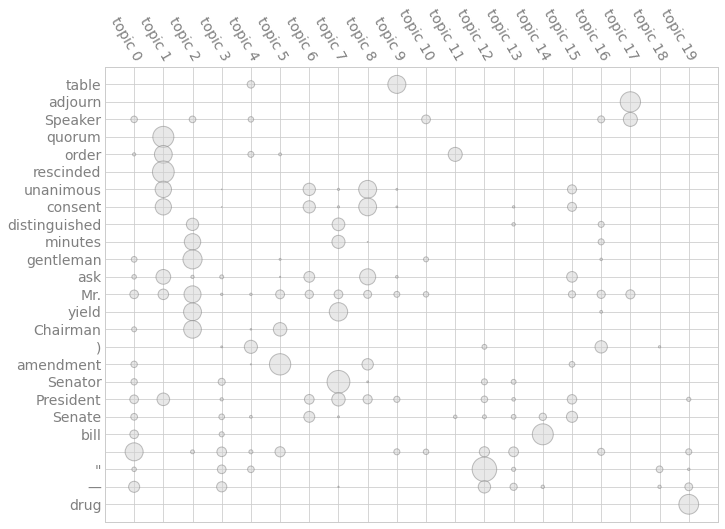

In [ ]:
model.termite_plot(doc_term_matrix, vectorizer.id_to_term,
                  topics=-1,  n_terms=25, sort_terms_by='seriation')

You can save the trained model for future use.

In [ ]:
model.save('nmf-20topics.pkl')

## Conclusion

In this tutorial, we learned some advanced text analytics techniques, these techniques are either used to extract (semi-structured) information from text, or summarizing text using most important terms or topics.

The techniques you learned in part 1 & 2 cover the most important NLP tasks in the field of text mining. Feel free to try them on your own.

### Have fun text mining!

### Useful Links
- [TextaCy API references](https://textacy.readthedocs.io/en/0.10.1/api_reference/root.html)
- [Natural Language Processing is Fun!](https://medium.com/@ageitgey/natural-language-processing-is-fun-9a0bff37854e)
- [spaCy 101: Everything you need to know](https://spacy.io/usage/spacy-101)

__PLEASE complete both parts of the tutorial and submit back using GitHub classroom.__